In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_production_data = pd.read_csv("../datasets/capstone/coffee-production-2016-1990--USDA-FAS--psd_coffee.csv")

In [3]:
uncleaned_production_data = raw_production_data.copy()
production_data = uncleaned_production_data[["Country_Name", "Market_Year", "Attribute_Description", "Value"]]
production_data.loc[:, "Value (60kg bags)"] = production_data.loc[:, "Value"] * 1000
production_data.drop("Value", axis = 1, inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

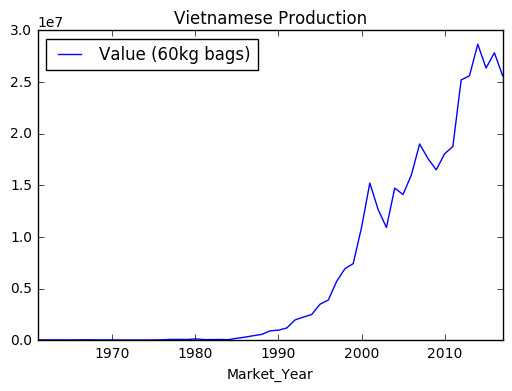

In [36]:
production_data[(production_data["Country_Name"] == "Vietnam") 
                          & (production_data["Attribute_Description"] == "Robusta Production")
                         ].plot(x = "Market_Year", y = "Value (60kg bags)")
plt.title("Vietnamese Production")
plt.show()

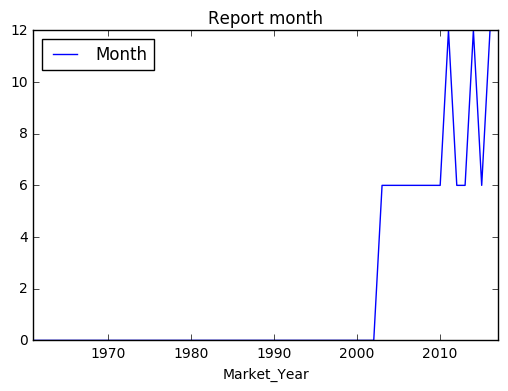

In [5]:
uncleaned_production_data[uncleaned_production_data["Country_Name"] == "Brazil"].plot(x = "Market_Year", y = "Month")
plt.title("Report month")
plt.show()

In [6]:
ICO_country_classifications = pd.read_csv("../datasets/capstone/ICO composite indicator index country classification.csv")
ICO_country_classifications.columns = ["Country", "Brazilian Naturals","Colombian Milds","Other Milds", "Robustas"]

In [7]:
brazlian_naturals_countries = ICO_country_classifications[ICO_country_classifications["Brazilian Naturals"]][["Country"]]
colombian_milds_countries = ICO_country_classifications[ICO_country_classifications["Colombian Milds"]][["Country"]]
other_milds_countries = ICO_country_classifications[ICO_country_classifications["Other Milds"]][["Country"]]
robustas_countries = ICO_country_classifications[ICO_country_classifications["Robustas"]][["Country"]]

In [8]:
brazlian_naturals_data = brazlian_naturals_countries.merge(production_data, left_on = "Country", right_on = "Country_Name").drop("Country_Name", axis = 1)
colombian_milds_data = colombian_milds_countries.merge(production_data, left_on = "Country", right_on = "Country_Name").drop("Country_Name", axis = 1)
other_milds_data = other_milds_countries.merge(production_data, left_on = "Country", right_on = "Country_Name").drop("Country_Name", axis = 1)
robusta_data = robustas_countries.merge(production_data, left_on = "Country", right_on = "Country_Name").drop("Country_Name", axis = 1)

In [19]:
brazlian_naturals_production = brazlian_naturals_data[other_milds_data["Attribute_Description"] == "Arabica Production"].drop("Attribute_Description", axis = 1)
colombian_milds_production = colombian_milds_data[colombian_milds_data["Attribute_Description"] == "Arabica Production"].drop("Attribute_Description", axis = 1)
other_milds_production = other_milds_data[other_milds_data["Attribute_Description"] == "Arabica Production"].drop("Attribute_Description", axis = 1)
robusta_production = robusta_data[robusta_data["Attribute_Description"] == "Robusta Production"].drop("Attribute_Description", axis = 1)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [27]:
aggregate_brazlian_naturals_production = brazlian_naturals_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_colombian_milds_production = colombian_milds_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_other_milds_production = other_milds_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()
aggregate_robusta_production = robusta_production.groupby(by = "Market_Year")["Value (60kg bags)"].sum()


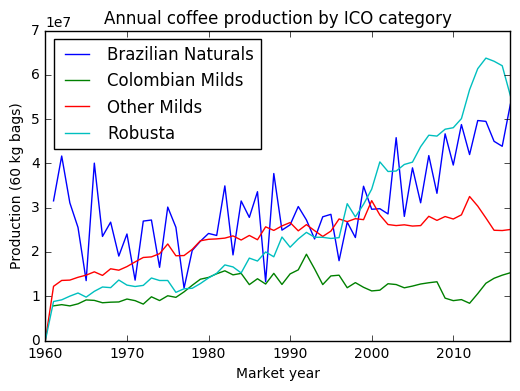

In [28]:
aggregate_brazlian_naturals_production.plot()
aggregate_colombian_milds_production.plot()
aggregate_other_milds_production.plot()
aggregate_robusta_production.plot()

plt.title("Annual coffee production by ICO category")
plt.legend(["Brazilian Naturals", "Colombian Milds", "Other Milds", "Robusta"], loc = 'best')
plt.xlabel("Market year")
plt.ylabel("Production (60 kg bags)")
plt.show()

In [31]:
uncleaned_production_data.Attribute_Description.unique()

array(['Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks',
       'Exports', 'Imports', 'Other Production', 'Production',
       'Roast & Ground Exports', 'Roast & Ground Imports',
       'Robusta Production', 'Rst,Ground Dom. Consum',
       'Soluble Dom. Cons.', 'Soluble Exports', 'Soluble Imports',
       'Total Distribution', 'Total Supply'], dtype=object)